# Librerias y conexión a drive

In [1]:
%%capture
!pip install netcdf4

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Abriendo netCDF

In [4]:
ruta_pp = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov2p1(prec).nc"
PISCO_pp = xr.open_dataset(ruta_pp,decode_times=False)
PISCO_pp

<xarray.Dataset>
Dimensions:  (X: 133, T: 432, Y: 198)
Coordinates:
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
Data variables:
    Prec     (T, Y, X) float32 ...

In [5]:
PISCO_pp=PISCO_pp.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_pp #corregir el tema de las coordenadas

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 432, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) float32 252.5 253.5 254.5 255.5 ... 681.5 682.5 683.5
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [6]:
PISCO_pp["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
PISCO_pp #me parece que el periods es el numero de meeses, tmb sale indicado en la tabla
#cambiando eje temporal

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 432, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2016-12-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [7]:
pp_filtro=PISCO_pp.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
pp_filtro

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 348, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

# Figura 5a Pp anual

## PP 1981-2016

In [8]:
pp_anual = PISCO_pp.sel(time= slice('1981-06-01', '2016-05-31')).groupby('time.year').sum('time') #segun la grafica, toma datos desde aca
pp_anual

<xarray.Dataset>
Dimensions:    (longitude: 133, latitude: 198, year: 36)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    Prec       (year, latitude, longitude) float32 0.0 0.0 0.0 ... 186.0 184.0

In [9]:
pp_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))

<xarray.Dataset>
Dimensions:    (longitude: 55, latitude: 62, year: 36)
Coordinates:
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    Prec       (year, latitude, longitude) float32 628.9 761.9 ... 194.0 172.1

In [10]:
pp_anual = pp_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
pp_anual

<xarray.Dataset>
Dimensions:    (longitude: 55, latitude: 62, year: 36)
Coordinates:
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    Prec       (year, latitude, longitude) float32 628.9 761.9 ... 194.0 172.1

In [11]:
pp_anual.to_dataframe()

Prec
longitude  latitude year             
-73.450005 -12.55   1981   628.901245
                    1982  1551.061768
                    1983  1083.240479
                    1984   764.868896
                    1985  1483.728394
...                               ...
-68.050003 -18.65   2012   410.314728
                    2013   217.036072
                    2014   160.510345
                    2015   251.185471
                    2016   172.113800

[122760 rows x 1 columns]

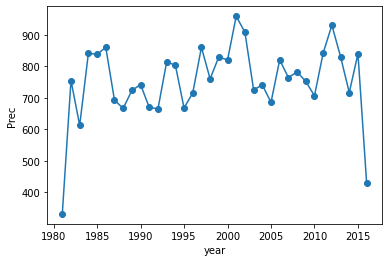

In [12]:
pp_anual.mean(dim=("latitude","longitude")).Prec.plot(marker="o")

In [13]:
pp_anual.mean(dim=("latitude","longitude")).Prec

<xarray.DataArray 'Prec' (year: 36)>
array([331.81628, 754.76764, 612.6084 , 841.1662 , 837.949  , 859.5931 ,
       692.8397 , 666.2081 , 723.3422 , 741.9198 , 669.5995 , 664.70807,
       813.3437 , 803.8808 , 667.8292 , 715.34064, 859.7778 , 760.006  ,
       829.9574 , 819.6859 , 958.56036, 907.9932 , 725.31805, 740.8273 ,
       685.67175, 820.2304 , 764.05927, 782.13226, 751.89294, 706.42096,
       842.1768 , 930.072  , 830.31335, 716.4916 , 839.7357 , 428.319  ],
      dtype=float32)
Coordinates:
  * year     (year) int64 1981 1982 1983 1984 1985 ... 2012 2013 2014 2015 2016

In [14]:
y = pp_anual.mean(dim=("latitude","longitude")).Prec.to_numpy()
y

array([331.81628, 754.76764, 612.6084 , 841.1662 , 837.949  , 859.5931 ,
       692.8397 , 666.2081 , 723.3422 , 741.9198 , 669.5995 , 664.70807,
       813.3437 , 803.8808 , 667.8292 , 715.34064, 859.7778 , 760.006  ,
       829.9574 , 819.6859 , 958.56036, 907.9932 , 725.31805, 740.8273 ,
       685.67175, 820.2304 , 764.05927, 782.13226, 751.89294, 706.42096,
       842.1768 , 930.072  , 830.31335, 716.4916 , 839.7357 , 428.319  ],
      dtype=float32)

In [15]:
x= pp_anual["year"].to_numpy()
x

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

## Figura 5b: Pp por estación

In [16]:
pp_filtro=PISCO_pp.sel(time=slice('1981-06-01T00:00:00.000000000','2016-05-31T12:00:00.000000000'))
pp_filtro

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 420, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2016-05-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [17]:
pp_monthly = pp_filtro.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
pp_monthly

<xarray.Dataset>
Dimensions:    (longitude: 55, time: 420, latitude: 62)
Coordinates:
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2016-05-31
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [18]:
pp_df = pp_monthly.mean(dim=("latitude","longitude")).to_dataframe()
pp_df

,Prec
time,
1981-06-30,10.893129
1981-07-31,5.128040
1981-08-31,35.498985
1981-09-30,35.295307
1981-10-31,84.126411
...,...
2016-01-31,116.103134
2016-02-29,213.991806
2016-03-31,67.647362


In [19]:
pp_df.dtypes

Prec    float32
dtype: object

In [20]:
pp_df["month"] = pp_filtro["time"].dt.month
pp_df["year"] = pp_filtro["time"].dt.year
pp_df


,Prec,month,year
time,,,
1981-06-30,10.893129,6,1981
1981-07-31,5.128040,7,1981
1981-08-31,35.498985,8,1981
1981-09-30,35.295307,9,1981
1981-10-31,84.126411,10,1981
...,...,...,...
2016-01-31,116.103134,1,2016
2016-02-29,213.991806,2,2016
2016-03-31,67.647362,3,2016


In [21]:
pp_JJA = pp_df[(pp_df["month"]== 6) | (pp_df["month"]==7) | (pp_df["month"]==8) ]
pp_JJA

,Prec,month,year
time,,,
1981-06-30,10.893129,6,1981
1981-07-31,5.128040,7,1981
1981-08-31,35.498985,8,1981
1982-06-30,14.872751,6,1982
1982-07-31,10.070962,7,1982
...,...,...,...
2014-07-31,11.378231,7,2014
2014-08-31,18.860273,8,2014
2015-06-30,10.977574,6,2015


In [22]:
pp_DJF = pp_df[(pp_df["month"]== 12) | (pp_df["month"]==1) | (pp_df["month"]==2) ]
pp_DJF

,Prec,month,year
time,,,
1981-12-31,125.288147,12,1981
1982-01-31,175.255402,1,1982
1982-02-28,126.104103,2,1982
1982-12-31,88.377792,12,1982
1983-01-31,160.573303,1,1983
...,...,...,...
2015-01-31,195.846420,1,2015
2015-02-28,164.504242,2,2015
2015-12-31,109.165497,12,2015


In [23]:
pp_SON = pp_df[(pp_df["month"]== 9) | (pp_df["month"]==10) | (pp_df["month"]==11) ]
pp_SON

,Prec,month,year
time,,,
1981-09-30,35.295307,9,1981
1981-10-31,84.126411,10,1981
1981-11-30,87.327072,11,1981
1982-09-30,46.806198,9,1982
1982-10-31,73.294693,10,1982
...,...,...,...
2014-10-31,59.725811,10,2014
2014-11-30,55.929710,11,2014
2015-09-30,29.844492,9,2015


In [24]:
pp_MOM = pp_df[(pp_df["month"]== 3) | (pp_df["month"]==4) | (pp_df["month"]==5) ]
pp_MOM

,Prec,month,year
time,,,
1982-03-31,118.523148,3,1982
1982-04-30,74.257973,4,1982
1982-05-31,10.793965,5,1982
1983-03-31,95.016983,3,1983
1983-04-30,64.644173,4,1983
...,...,...,...
2015-04-30,96.439293,4,2015
2015-05-31,32.316750,5,2015
2016-03-31,67.647362,3,2016


In [25]:
pp_MAM_yearly= pp_MOM.resample("1Y").sum()
pp_MAM_yearly

,Prec,month,year
time,,,
1982-12-31,203.575089,12,5946
1983-12-31,201.749786,12,5949
1984-12-31,191.025940,12,5952
1985-12-31,243.195297,12,5955
1986-12-31,268.570038,12,5958
1987-12-31,139.186722,12,5961
1988-12-31,254.066498,12,5964
1989-12-31,223.699188,12,5967
1990-12-31,178.534393,12,5970


In [26]:
pp_DJF_yearly= pp_DJF.resample("1Y").sum()
pp_JJA_yearly= pp_JJA.resample("1Y").sum()
pp_SON_yearly= pp_SON.resample("1Y").sum()

In [27]:
pp_MAM_yearly["Prec"].to_numpy()

array([203.57509, 201.74979, 191.02594, 243.1953 , 268.57004, 139.18672,
       254.0665 , 223.69919, 178.5344 , 202.23889, 140.29123, 231.37709,
       223.40044, 201.41888, 182.98042, 231.78784, 193.51582, 277.78812,
       195.96724, 290.08282, 276.55167, 212.14645, 169.31526, 162.12411,
       212.08958, 281.44067, 169.35138, 187.51384, 172.52457, 197.78612,
       249.9513 , 194.305  , 187.653  , 279.9323 , 165.01277],
      dtype=float32)

(0.0, 600.0)

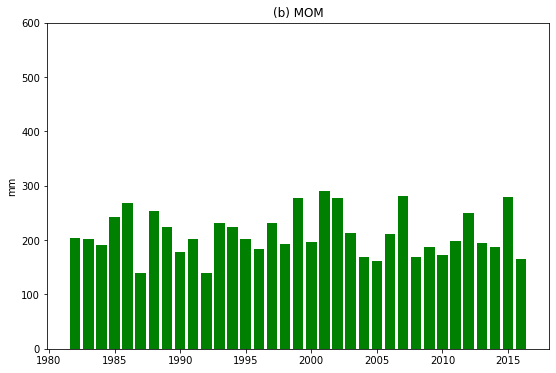

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
y = pp_MAM_yearly["Prec"].to_numpy()
x = np.arange(1982,2017,1)
ax.bar(x,y, color="green")
ax.set_ylabel("mm")
ax.set_xlabel("")
ax.set_title("(b) MOM")
ax.set_ylim(0,600)

(0.0, 600.0)

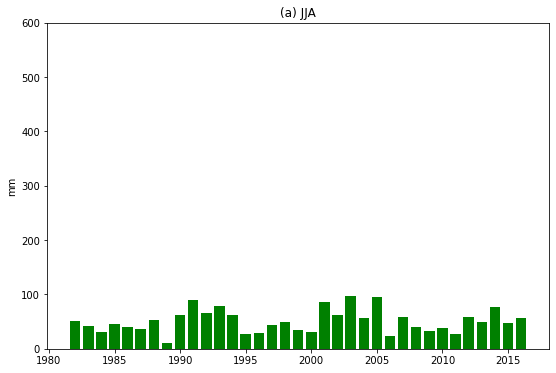

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))
y = pp_JJA_yearly["Prec"].to_numpy()
x = np.arange(1982,2017,1)
ax.bar(x,y, color="green")
ax.set_ylabel("mm")
ax.set_xlabel("")
ax.set_title("(a) JJA")
ax.set_ylim(0,600)

(0.0, 600.0)

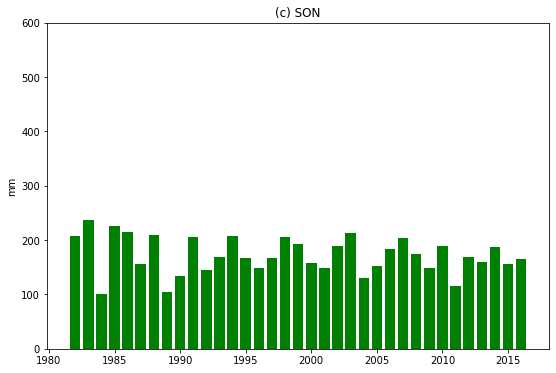

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))
y = pp_SON_yearly["Prec"].to_numpy()
x = np.arange(1982,2017,1)
ax.bar(x,y, color="green")
ax.set_ylabel("mm")
ax.set_xlabel("")
ax.set_title("(c) SON")
ax.set_ylim(0,600)

(0.0, 650.0)

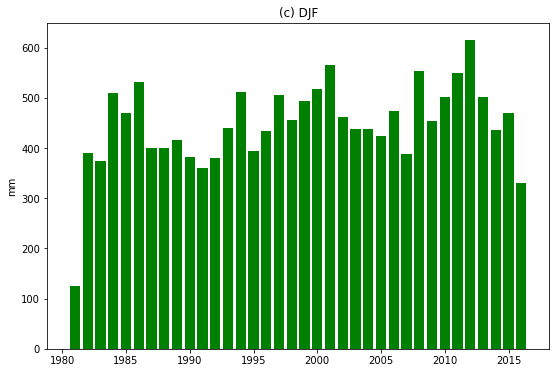

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))
y = pp_DJF_yearly["Prec"].to_numpy()
x = np.arange(1981,2017,1)
ax.bar(x,y, color="green")
ax.set_ylabel("mm")
ax.set_xlabel("")
ax.set_title("(c) DJF")
ax.set_ylim(0,650)

# RESULTADO

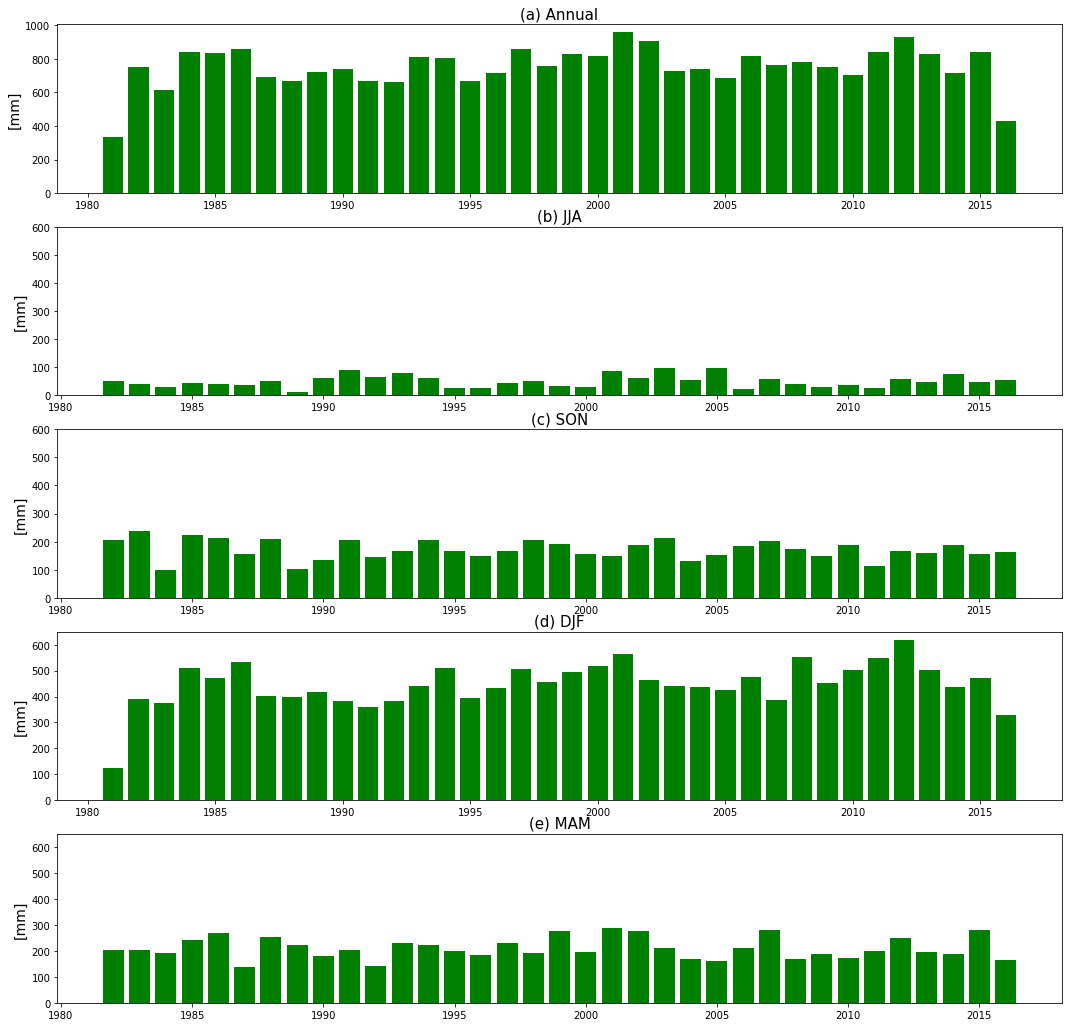

In [32]:
fig, axs = plt.subplots(5, 1, figsize=(18, 18))
#ANUAL
ax1 = axs[0]
y = pp_anual.mean(dim=("latitude","longitude")).Prec.to_numpy()
x = pp_anual["year"].to_numpy()
ax1.bar(x,y, color="green")
ax1.set_ylabel("[mm]",size=14)
ax1.set_xlabel("")
ax1.set_title("(a) Annual",fontsize=15)

#JJA
ax2 = axs[1]
y2 = pp_JJA_yearly["Prec"].to_numpy()
x2= np.arange(1982,2017,1)
ax2.bar(x2,y2, color="green")
ax2.set_ylabel("[mm]",size=14)
ax2.set_xlabel("")
ax2.set_title("(b) JJA",fontsize=15)
ax2.set_ylim(0,600)

#SON
ax3 = axs[2]
y3 = pp_SON_yearly["Prec"].to_numpy()
x3 = np.arange(1982,2017,1)
ax3.bar(x3,y3, color="green")
ax3.set_ylabel("[mm]",size=14)
ax3.set_xlabel("")
ax3.set_title("(c) SON",fontsize=15)
ax3.set_ylim(0,600)

#DJF
ax4 = axs[3]
y4 = pp_DJF_yearly["Prec"].to_numpy()
x4 = np.arange(1981,2017,1)
ax4.bar(x4,y4, color="green")
ax4.set_ylabel("[mm]",size=14)
ax4.set_xlabel("")
ax4.set_title("(d) DJF",fontsize=15)
ax4.set_ylim(0,650)

#MAM
ax5 = axs[4]
y5 = pp_MAM_yearly["Prec"].to_numpy()
x5 = np.arange(1982,2017,1)
ax5.bar(x5,y5, color="green")
ax5.set_ylabel("[mm]",size=14)
ax4.set_xlabel("")
ax5.set_title("(e) MAM",fontsize=15)
ax5.set_ylim(0,650)
fig.savefig("Figura5.png")